## Image processing using scikit-image

## Installation

```
pip install scikit-image
```
or 
```
conda install -c conda-forge scikit-image
```

There are various image processing and fourier analysis tools such as opencv, scipy.ndimage, pyFFTW and pillow.

In [60]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Test images

In [2]:
from skimage import data

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


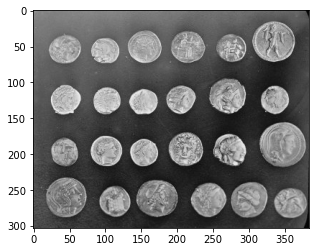

In [3]:
coins = data.coins()

print((f'Type: {type(coins)}\n'
       f'dtype: {coins.dtype}\n'
       f'shape: {coins.shape}'))
plt.imshow(coins, cmap='gray');

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (300, 451, 3)


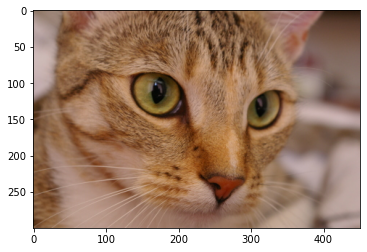

In [4]:
cat = data.chelsea()

print((f'Type: {type(cat)}\n'
       f'dtype: {cat.dtype}\n'
       f'shape: {cat.shape}'))
plt.imshow(cat);

## Basic color manipulation

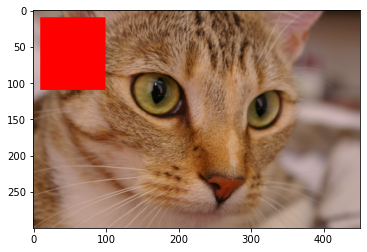

In [5]:
cat_copy = cat.copy()

cat_copy[10:110,10:100,:] = [255,0,0] #RGB
plt.imshow(cat_copy);

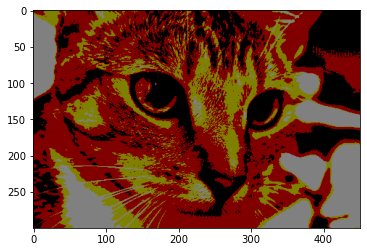

In [6]:
# color-based segmentation
n= 128

cat_seg = (cat//n)*n

plt.imshow(cat_seg);

## Image augumentation

In [7]:
from skimage import transform

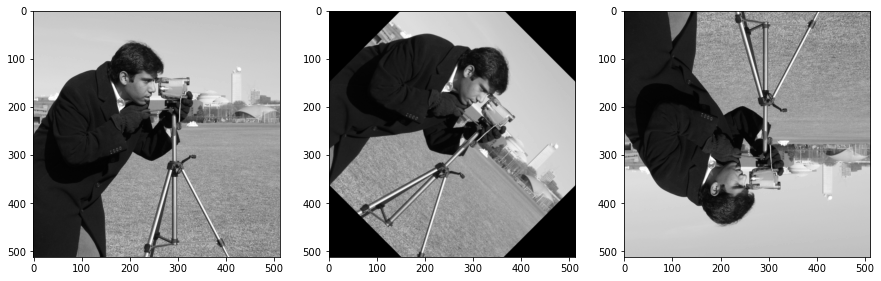

In [8]:
cman = data.camera()

fig,axes = plt.subplots(1,3,figsize=(15,45))
ax = axes[0]
ax.imshow(cman,cmap='gray');
# rotation
rot_cman= transform.rotate(cman,-45)

ax = axes[1]
ax.imshow(rot_cman,cmap='gray');
# inversion
inv_cman = cman[::-1,:] # invert row values

ax = axes[2]
ax.imshow(inv_cman,cmap='gray');

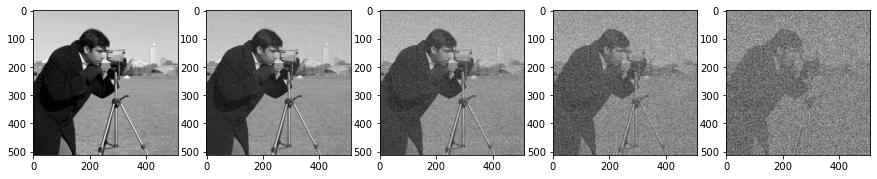

In [9]:
# noising 
n = 5

cman = data.camera()//n
noise = (np.random.random(cman.shape)*255/n).astype(np.uint8)

fig, axes = plt.subplots(1,n,figsize=(15,15*n))
for i in range(n):
    axes[i].imshow(cman*(n-i) + noise*i,cmap='gray')

## Image Fourier transform

In [10]:
from scipy.fft import fft2,ifft2 # scipy fft generally faster than numpy fft
from numpy.fft import fftshift, ifftshift

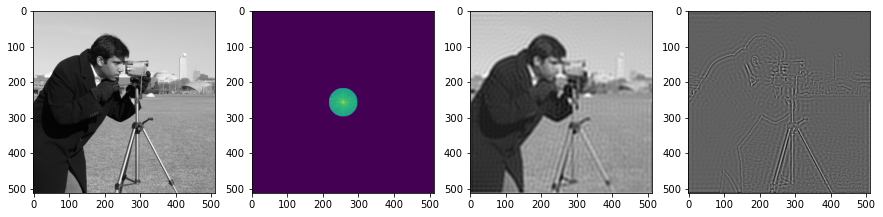

In [42]:
cman = data.camera()

fig, axes = plt.subplots(1,4,figsize=(15,60))
axes[0].imshow(cman,cmap='gray')
# fft
cman_fft = ifftshift(fft2(cman))
row,column = cman_fft.shape
spfilter = np.fromfunction(lambda r,c: (r-row//2)**2+(c-column//2)**2 < 40**2,(row,column))

axes[1].imshow(np.log(np.abs(cman_fft))*spfilter)
# filtering and ifft
cman_high_filtered = np.real(ifft2(ifftshift(cman_fft*spfilter)))
cman_row_filtered = np.real(ifft2(ifftshift(cman_fft*np.logical_not(spfilter))))


axes[2].imshow(cman_high_filtered,cmap='gray')
axes[3].imshow(cman_row_filtered,cmap='gray');

## Image Filters

In [59]:
from skimage import exposure

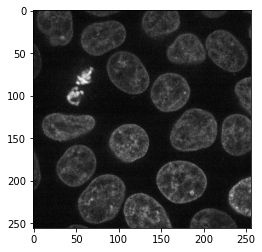

In [45]:
# test data
cell = data.cells3d()[:,1,:,:]
cell_slice = cell[30] 
plt.imshow(cell_slice,cmap='gray');

**gamma filter**

Nonlinear operation used to encode and decode luminance in image. Given input 0-1,

$$
V_{out} = AV_{in}^\gamma
$$

Usually, A = 1

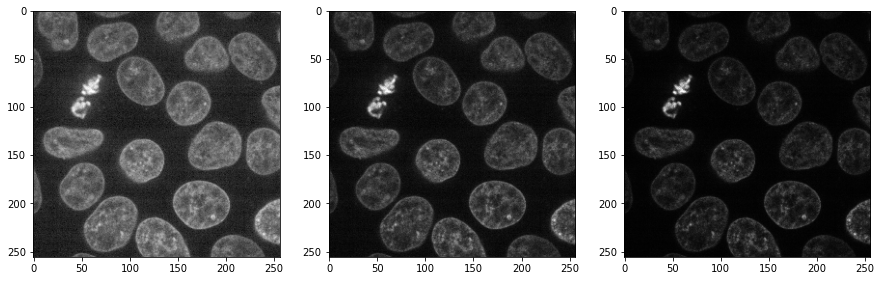

In [50]:
# gamma filter
gamma_low = exposure.adjust_gamma(cell_slice,gamma=0.5)
gamma_high = exposure.adjust_gamma(cell_slice,gamma=1.5)


fig, axes = plt.subplots(1,3,figsize=(15,45))
axes[0].imshow(gamma_low,cmap='gray')
axes[1].imshow(cell_slice,cmap='gray')
axes[2].imshow(gamma_high,cmap='gray');

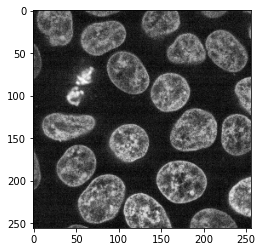

In [57]:
# equalize_adapthist
AHE = exposure.equalize_adapthist(cell_slice)
plt.imshow(AHE,cmap='gray');

## Image segmentation

In [65]:
from skimage import filters
from skimage import segmentation as seg
from skimage import morphology as mph
from skimage import measure

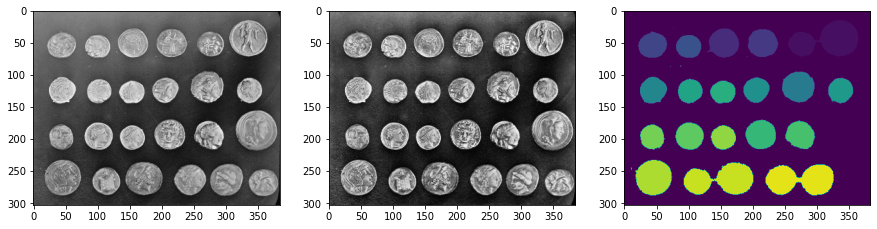

In [90]:
# threshold-based algorithm

coins = data.coins()

#
coins_h_cont = exposure.equalize_adapthist(exposure.adjust_gamma(coins,gamma=1.5))
# otsu thresholding
thresh = filters.threshold_otsu(coins_h_cont)
# closing = dilation + erosion
bw = mph.closing(coins_h_cont > thresh, mph.disk(5))
cleared = seg.clear_border(bw)
label_img = measure.label(cleared)

fig, axes = plt.subplots(1,3,figsize=(15,45))
axes[0].imshow(coins,cmap='gray')
axes[1].imshow(coins_h_cont,cmap='gray')
axes[2].imshow(label_img);

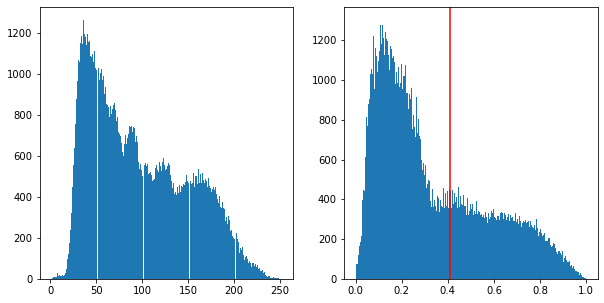

In [97]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(coins.ravel(),bins=256)
axes[1].hist(coins_h_cont.ravel(),bins=256)
axes[1].axvline(thresh,color='r');